# Land Capacity Analysis

## Eastsound Example

The analysis uses parcel data from March 3, 2017. So we'll grab that data and visualize it on a map centered on Eastsound.

In [58]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS
import os

In [59]:
import getpass
password = getpass.getpass("Enter admin password for ArcGIS Online")
gis = GIS("https://sjcgis.maps.arcgis.com", "npeihl", password)

Enter admin password for ArcGIS Online········


In [60]:
map = gis.map("Eastsound, WA", zoomlevel=15)
map.basemap = 'gray'

In [61]:
parcels = gis.content.search("Parcels for Land Capacity Analysis", item_type="feature service")[0]
parcels

<Item title:"Parcels for Land Capacity Analysis (March 2017)" type:Feature Service owner:npeihl>

In [62]:
map.add_layer(parcels)
map

## Assemble Gross Developable Land Inventory

The purpose of the assessment of land supply is to identify all lands within the County that are considered vacant, partially-used, or redevelopable. These lands comprise the Gross Developable Land Inventory. 

### Data Preparation

The parcels do not specify whether or not they are in the Eastsound UGA. Nor do they specify the land use density or land use designations. Addtionally, some of the parcels have split zones. We could try determining these using GIS analysis tools such as spatial join or intersect. But the parcel and density/land use dataset boundaries are not always coincident so we may end up with sliver polygons and less than ideal analyses results.

### Avoiding sliver polygons

1. Create a copy of the parcels layer. 
2. Create fields for jursidiction, density, and land use designation.
3. Manually edit the dual zone parcels by splitting them at the density boundaries.
4. Fill in the jurisdiction, density, and land use designation fields either by hand or using a spatial join. 

The Urban Growth Areas, Town Boundary, Density zoning, and land use designations can all be downloaded from the [Open Data website](http://data.sjcgis.org)

*Note* Be careful with the spatial join tool when using "Have their center in" as this parameter will not guarantee the centroid will occur within the polygon. See the example below where the centroid for the polygon is located outside of the polygon boundaries.

In [63]:
centroidMap = gis.map([48.635653,-122.881994], zoomlevel=16)
parcel = parcels.layers[0]
centroidMap.add_layer({"type": "FeatureLayer",
                     "url": parcel.url,
                     "definition_expression": "PIN = '260141005000'",
                     "opacity": 0.7
                    })
centroidMap.draw({"x": -122.881994, "y": 48.635653, "spatialReference": { "wkid": 4326}})
centroidMap

### Eastsound LCA Land Use Layer

The GIS team has performed the above data preparation steps for Eastsound UGA and the resulting data is accessible below.

<Item title:"LCA_Parcels_EastsoundUGA" type:Feature Service owner:npeihl>
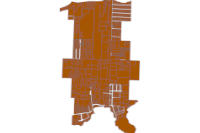

In [64]:
eastsoundUga = gis.content.search('LCA Parcels Eastsound')[0]
eastsoundUga

### Define density units per acre and minimum lot size

The list below defines the units per acre and minimum lot size (if applicable) for each density type

In [65]:
density = {
   "1": {
      "UnitsAcre": 1,
      "MinLotSize": 0
   },
   "2": {
      "UnitsAcre": 0.5,
      "MinLotSize": 0
   },
   "5": {
      "UnitsAcre": 0.2,
      "MinLotSize": 0
   },
   "10": {
      "UnitsAcre": 0.1,
      "MinLotSize": 0
   },
   "15": {
      "UnitsAcre": 0.0667,
      "MinLotSize": 0
   },
   "20": {
      "UnitsAcre": 0.05,
      "MinLotSize": 0
   },
   "40": {
      "UnitsAcre": 0.025,
      "MinLotSize": 0
   },
   "0.01": {
      "UnitsAcre": 100,
      "MinLotSize": 0
   },
   "0.25": {
      "UnitsAcre": 4,
      "MinLotSize": 0
   },
   "0.5": {
      "UnitsAcre": 2,
      "MinLotSize": 0
   },
   "0.65": {
      "UnitsAcre": 1.5,
      "MinLotSize": 0
   },
   "2 BDD": {
      "UnitsAcre": 0.5,
      "MinLotSize": 0
   },
   "2*": {
      "UnitsAcre": 0.5,
      "MinLotSize": 0
   },
   "CCC": {
      "UnitsAcre": 2,
      "MinLotSize": 0
   },
   "EAD": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "EN": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "ER": {
      "UnitsAcre": 0.2,
      "MinLotSize": 0
   },
   "ER1": {
      "UnitsAcre": 1,
      "MinLotSize": 0
   },
   "ER1P": {
      "UnitsAcre": 1,
      "MinLotSize": 0
   },
   "ER2": {
      "UnitsAcre": 2,
      "MinLotSize": 0
   },
   "ER2P": {
      "UnitsAcre": 2,
      "MinLotSize": 0
   },
   "ER412": {
      "UnitsAcre": 12,
      "MinLotSize": 0
   },
   "ER4P": {
      "UnitsAcre": 4,
      "MinLotSize": 0
   },
   "ERR": {
      "UnitsAcre": 0.2,
      "MinLotSize": 0
   },
   "ERR2": {
      "UnitsAcre": 0.5,
      "MinLotSize": 0
   },
   "M": {
      "UnitsAcre": 8,
      "MinLotSize": 0
   },
   "N": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "N SPD": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "P": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "P SPD": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "RMP": {
      "UnitsAcre": 0.5,
      "MinLotSize": 0
   },
   "SLI": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "SP": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   },
   "VC": {
      "UnitsAcre": 40,
      "MinLotSize": 0
   },
   "VR": {
      "UnitsAcre": 12,
      "MinLotSize": 0
   },
   "W": {
      "UnitsAcre": 0,
      "MinLotSize": 0
   }
}

In [66]:
residentialLU = ['AG', 'C', 'ER', 'ER1', 'ER1P', 'ER2', 'ER2P', 'ER412', 'ER4P', 'ERR', 'ERRP2', 'FO', 'HR', 'OLGA', 'OVR2', 'RFF', 'RR', 'RR+', 'VR']
indComInsLU = ['RG', 'RI', 'RC', 'VC', 'VCL','HC', 'HI','IC', 'SLI','SP','CCC' ,'M','EAD','OHC','OVC', 'OVT']
mixedLU = ['VC', 'VCL']
publicLU = ['EN', 'N']

### Fully Developed Residential Lands
(No further development potential)

Assessors codes:
* 1100-1199 (except 1127, 1180) SFRS;
* 1200-1223 Multifamily;
* 1300-1302 Multifamily;
* 1500 Manufactured housing;
* 1900-1920: Vacation/seasonal homes;
* 8100-8328: Agriculture; 
* 9200: Non-commercial forest; 
* 9420-9423: Open space with conservation easement



In [67]:
from itertools import chain
resFullDevCodes = chain(range(1100, 1200), 
                        range(1200,1224),
                        range(1300, 1303),
                        range(1500, 1501),
                        range(1900, 1921),
                        range(8100, 8329),
                        range(9200, 9201),
                        range(9420, 9424))



**Definition**
* Assessed improvement value > $10,000
* Ratio of allowed density to parcel size > 0.5


In [68]:
def fullyDevelopedRes (imp_val, lu, density, parcel_size,**kwargs):
    if lu in residentialLU and imp_val > 10000 and density/parcel_size > 0.5:
        return True
    else:
        return False
        
display(fullyDevelopedRes(10000, 'ER', 1.75, 2)) # returns False
display(fullyDevelopedRes(20000, 'EN', 1.75, 2)) # returns False
display(fullyDevelopedRes(20000, 'ER', 1, 2)) # returns False
display(fullyDevelopedRes(20000, 'ER', 1.75, 2)) # returns True

False

False

False

True

### Fully Developed Industrial, Commercial, and Institutional Lands
(No further development potential)

Assessors codes:
* 1400-1488 Accommodations
* 1600 Hotels/motels
* 1700 Institutional lodging
* 2100 Food and kindred products
* 2200 Textile Mill Products
* 2400-2403: Lumber and wood products
* 2500: Furniture/fixtures
* 2600: Paper and Allied products 
* 2700: Printing and publishing 
* 2800: Chemicals 
* 2900: Petroleum refining and related 
* 3100: Rubber and misc. plastic products 
* 3200: Stone, clay and glass 
* 3300: Primary metal industries
* 3400: Fabricated metal products 
* 3500: Prof. & Scientific Instruments 
* 3900: Misc. Manufacturing 
* 4100: Railroad & Transit
* 4200: Motor vehicle transportation 
* 4300: Aircraft transportation 
* 4400: Marine transportation 
* 4600: Automobile parking 
* 4700 Communications
* 4900: Other transportation 
* 5000: Non-residential condominiums 
* 5100: Wholesale trade 
* 5200: Building & hardware & farm
* 5300-5320: General merchandise
* 5400-5403: Retail food 
* 5500-5503: Retail- auto, marine, aircraft 
* 5600: Apparel 
* 5700-5708: Retail – furniture & home furnishings
* 5800: Retail- Eating & drinking
* 5900: Other retail 
* 6100: Finance, insurance & real estate 
* 6200-6220: Personal services 
* 6300: Business services 
* 6400-6402: Repair services 
* 6500-6503: Professional services 
* 6600 Contract construction services 
* 6900-6902 Miscellaneous services 
* 7100: Cultural activities
* 7200-7202: Public assembly 
* 7300: Amusements
* 7400-7420: Recreational activities 
* 7500: Resorts and group camps 
* 7900: Other recreational 
* 8100-8328: Agriculture 
* 8400: Fishing and related services 
* 8500: Mining activities
* 8600: Marijuana grow operation 
* 8900: Other resource production


** Definition **
* Ratio of building value to land value is >1.0
* Ratio of allowed density/minimum parcel size to parcel size is > 0.5
* **TODO** Identify existing development, such as gas stations, quarries or uses that preclude significant additional development on the site, as fully developed when the ratio of improvement value to land value is less than 1. If identified as fully developed, the parcel will be subtracted from the inventory.


In [69]:
def fullyDevelopedIndComIns (imp_val, land_val, lu, density, parcel_size, min_size):
    if lu in indComInsLU and imp_val/land_val > 1.0 and (density/min_size)/parcel_size > 0.5:
        return True
    else:
        return False
    
display(fullyDevelopedIndComIns(1000000, 2000000, 'RC', 4.0, 1.0, 4.0)) # returns False
display(fullyDevelopedIndComIns(5000000, 2000000, 'FO', 4.0, 1.0, 4.0)) # returns False
display(fullyDevelopedIndComIns(5000000, 2000000, 'RC', 1.0, 1.0, 4.0)) # returns False
display(fullyDevelopedIndComIns(5000000, 2000000, 'RC', 4.0, 1.0, 4.0)) # returns True

False

False

False

True

### Mixed-Use: Fully Developed

Assessor’s codes: see list for industrial, commercial and institutional above.

** Definition **
* Ratio of building value to land value is >1.0
* Ratio of allowed density/minimum parcel size to parcel size is > 0.5

In [70]:
def fullyDevelopedMixedUse (imp_val, land_val, lu, density, min_size, parcel_size):
    if lu in mixedLU and imp_val/land_val > 1.0 and (density/min_size)/parcel_size > 0.5:
        return True
    else:
        return False
    
display(fullyDevelopedMixedUse(1000000, 2000000, 'VC', 4.0, 1.0, 4.0)) # returns False
display(fullyDevelopedMixedUse(5000000, 2000000, 'RFF', 4.0, 1.0, 4.0)) # returns False
display(fullyDevelopedMixedUse(5000000, 2000000, 'VC', 1.0, 1.0, 4.0)) # returns False
display(fullyDevelopedMixedUse(5000000, 2000000, 'VC', 4.0, 1.0, 4.0)) # returns True

False

False

False

True

### Public, Utility, and Conservation Lands

(No further development potential) 
Assessors Land Use Codes: 
* 7600: Parks
* 4800-4820: Utilities
* 6800-6820: Educational services
* 6700-6793: Governmental services
* 9240:  Open space with conservation easement
* 9243: Open Space with Conservation Easement and Dock
* 9520: Current Use Timber land with a Conservation Easement 
* 4820: Utility with Conservation Easement
* 6820: Educational services with Conservation Easement
* 7420: Recreational activities with Conservation Easement
* 8120: Agriculture with Conservation Easement
* 4500: Highway ROW
* 7400-7420: Recreational activities 
* 8800-8820: Designated forest land


In [71]:
def publicLand(lu):
    if lu in publicLU:
        return True
    else:
        return False

display(publicLand('RR')) # returns False
display(publicLand('N')) # returns True

False

True

### Residential: Vacant and subdividable

Assessors Code: 
* 9100-9123: Undeveloped land > 5 acres
* 1100-1199 (except 1127, 1180) SFRS;
* 1200-1223 Multifamily;
* 1300-1302 Multifamily;
* 1500 Manufactured housing;
* 1900-1920: Vacation/seasonal homes;
* 8100-8328: Agriculture; 
* 9200: Non-commercial forest; 
* 9420-9423: Open space with conservation easement.


** Definition **

Residential land will be considered vacant and sub-dividable where the following criteria apply: 
* Assessed Improvement value < $10,000;
* Parcels where the ratio of allowed density to parcel size is ≤ 0.5 may be subdividable;

In [72]:
def vacantDividableRes(imp_val, lu, density, parcel_size):
    if lu in residentialLU and imp_val < 10000 and density/parcel_size <= 0.5 and parcel_size > (2400/43560):
        return True
    else:
        return False
    
display(vacantDividableRes(10000, 'ER', 1, 2)) # returns False
display(vacantDividableRes(6000, 'VC', 1, 2)) # returns False
display(vacantDividableRes(6000, 'ER', 2, 2)) # returns False
display(vacantDividableRes(6000, 'ER', 0.025, 0.05)) # returns False
display(vacantDividableRes(6000, 'ER', 1, 2)) # returns True

False

False

False

False

True

### Residential Vacant

Assessor Codes:
* 1800-1895: Undeveloped Residential < 5 acres; 
* 1100-1199 (except 1127, 1180) SFRS;
* 1200-1223 Multifamily;
* 1300-1302 Multifamily;
* 1500 Manufactured housing;
* 1900-1920: Vacation/seasonal homes;
* 8100-8328: Agriculture; 
* 9200: Non-commercial forest; 
* 9420-9423: Open space with conservation easement.


** Definition **

Residential land categorized as vacant but not sub-dividable will meet the following criteria: 
* Assessed improvement value < $10,000;
* Parcels where the ratio of allowed density to parcel size is > 0.5 are not subdividable;
* Parcels < 2,400 square feet to be excluded.


In [73]:
def vacantRes(imp_val, lu, density, parcel_size):
    if lu in residentialLU and imp_val < 10000 and density/parcel_size > 0.5 and parcel_size > (2400/43560):
        return True
    else:
        return False
    
display(vacantRes(12000, 'ER', 2, 2)) # returns False
display(vacantRes(6000, 'VC', 2, 2)) # returns False
display(vacantRes(6000, 'ER', 1, 2)) # returns False
display(vacantRes(6000, 'ER', 0.025, 0.05)) # returns False
display(vacantRes(6000, 'ER', 2, 2)) # returns True

False

False

False

False

True

### Residential: Partially Used

Assessor Codes:
* 1100-1199 (except 1127, 1180) SFRS;
* 1200-1223 Multifamily;
* 1300-1302 Multifamily;
* 1500 Manufactured housing;
* 1900-1920: Vacation/seasonal homes;
* 8100-8328: Agriculture; 
* 9200: Non-commercial forest; 
* 9420-9423: Open space with conservation easement


** Definition **
* Assessed building  value > $10,000
* Parcels where the ratio of allowed density to parcel size is ≤ 0.5 may be sub-dividable and are considered partially used. 


In [74]:
def partiallyUsedRes(imp_val, lu, density, parcel_size):
    if lu in residentialLU and imp_val > 10000 and density/parcel_size <= 0.5 and parcel_size > (2400/43560):
        return True
    else:
        return False
    
display(partiallyUsedRes(6000, 'ER', 1, 2)) # returns False
display(partiallyUsedRes(150000, 'VC', 1, 2)) # returns False
display(partiallyUsedRes(150000, 'ER', 2, 1)) # returns False
display(partiallyUsedRes(150000, 'ER', 0.025, 0.05)) # returns False
display(partiallyUsedRes(150000, 'ER', 1, 2)) # returns True

False

False

False

False

True

### Vacant Industrial, Commercial, and Institutional Lands

See Assessor’s Codes for fully developed industrial, commercial and institutional lands above. 

** Definition **

Commercial or Industrial land will be considered vacant where: 
* Assessed improvement value < $10,000;
* Parcels where the ratio of allowed density/minimum parcel size per designation is < 0.5 are considered subdividable. 


In [75]:
def vacantIndComIns (imp_val, lu, density, parcel_size, min_size):
    if lu in indComInsLU and imp_val < 10000 and (density/min_size)/parcel_size < 0.5:
        return True
    else:
        return False
    
display(vacantIndComIns(50000, 'RC', 1.0, 1.0, 4.0)) # returns False
display(vacantIndComIns(6000, 'FO', 1.0, 1.0, 4.0)) # returns False
display(vacantIndComIns(6000, 'RC', 4.0, 1.0, 4.0)) # returns False
display(vacantIndComIns(6000, 'RC', 1.0, 1.0, 4.0)) # returns True
    

False

False

False

True

### Vacant Mixed-Use

See Assessors codes for fully developed industrial, commercial, and institutional lands above. 

** Definition **

Mixed use land will be considered vacant where: 
* Assessed improvement value < $10,000;
* Parcels where the ratio of allowed density/minimum parcel size per designation is < 0.5 are considered subdividable. 
* Sites that are partially developed may be split between the fully developed and undeveloped portions. (Not yet implemented)


In [76]:
def vacantMixedUse (imp_val, lu, density, parcel_size, min_size):
    if lu in mixedLU and imp_val < 10000 and (density/min_size)/parcel_size < 0.5:
        return True
    else:
        return False
    
display(vacantMixedUse(50000, 'VC', 1.0, 1.0, 4.0)) # returns False
display(vacantMixedUse(6000, 'RFF', 1.0, 1.0, 4.0)) # returns False
display(vacantMixedUse(6000, 'VC', 4.0, 1.0, 4.0)) # returns False
display(vacantMixedUse(6000, 'VC', 1.0, 1.0, 4.0)) # returns True

False

False

False

True

### Redevelopable Industrial, Commercial, and Institutional

Assumption is that existing use may be demolished and new project developed. 

See Assessors codes for fully developed industrial, commercial, and institutional lands above. 

** Definition **

Industrial, commercial and institutional sites that present one of the following conditions are considered re-developable:
* Ratio of building value to land value is ≤ 1.0; 
* Occupied by a single family residence. (Assessor’s codes 1100-1199)

Assumption is that existing use may be demolished and new project developed. 


In [77]:
def redevIndComIns (imp_val, land_val, lu, assr_code):
    if lu in indComInsLU and ((imp_val/land_val) <= 1.0 or assr_code in range(1100, 1200)):
        return True
    else:
        return False    

display(redevIndComIns(200000, 500000, 'RI', 1200)) # returns True
display(redevIndComIns(600000, 500000, 'RI', 1200)) # returns False
display(redevIndComIns(200000, 500000, 'RR', 1200)) # returns False
display(redevIndComIns(600000, 500000, 'RI', 1100)) # returns True

True

False

False

True

### Redevelopable Mixed-Use

See Assessors codes for fully developed industrial, commercial, and institutional lands above. 

** Definition **

Sites that present one of the following conditions are considered redevelopable: 
* Ratio of building value to land value is ≤1.0; 
* Occupied by a single family residence.
* Partially developed mixed use parcels may be split between the fully developed and vacant lands


In [78]:
def redevMixedUse (imp_val, land_val, lu, assr_code):
    if lu in mixedLU and (imp_val/land_val <= 1.0 or assr_code in range(1100, 1200)):
        return True
    else: 
        return False

display(redevMixedUse(200000, 500000, 'VC', 1200)) # returns True
display(redevMixedUse(600000, 500000, 'VC', 1200)) # returns False
display(redevMixedUse(200000, 500000, 'RR', 1200)) # returns False
display(redevMixedUse(600000, 500000, 'VC', 1100)) # returns True

True

False

False

True

### Unit Tests

Test the categorization functions using expected assertions.

In [79]:
-
    
kwargs = {
    'imp_val': 200000,
    'land_val': 40000,
    'lu': 'RC',
    'density': 4.0,
    'parcel_size': 1.0,
    'min_size': 4.0,
    'assr_code': 5500
}

display(field_calc(**kwargs))

(0, 'CI')

In [84]:
import unittest

class TestResidentialCategories(unittest.TestCase):
    def test_fullyDeveloped(self):
        self.assertFalse(fullyDevelopedRes(10000, 'ER', 1.75, 2)) # returns False
        self.assertFalse(fullyDevelopedRes(20000, 'EN', 1.75, 2)) # returns False
        self.assertFalse(fullyDevelopedRes(20000, 'ER', 1, 2)) # returns False
        self.assertTrue(fullyDevelopedRes(20000, 'ER', 1.75, 2)) # returns True
    
    def test_partiallyUsed(self):
        self.assertFalse(partiallyUsedRes(6000, 'ER', 1, 2)) # returns False
        self.assertFalse(partiallyUsedRes(150000, 'VC', 1, 2)) # returns False
        self.assertFalse(partiallyUsedRes(150000, 'ER', 2, 1)) # returns False
        self.assertFalse(partiallyUsedRes(150000, 'ER', 0.025, 0.05)) # returns False
        self.assertTrue(partiallyUsedRes(150000, 'ER', 1, 2)) # returns True
        
    def test_vacant(self):
        self.assertFalse(vacantRes(12000, 'ER', 2, 2)) # returns False
        self.assertFalse(vacantRes(6000, 'VC', 2, 2)) # returns False
        self.assertFalse(vacantRes(6000, 'ER', 1, 2)) # returns False
        self.assertFalse(vacantRes(6000, 'ER', 0.025, 0.05)) # returns False
        self.assertTrue(vacantRes(6000, 'ER', 2, 2)) # returns True
        
    def test_vacant_dividable(self):
        self.assertFalse(vacantDividableRes(10000, 'ER', 1, 2)) # returns False
        self.assertFalse(vacantDividableRes(6000, 'VC', 1, 2)) # returns False
        self.assertFalse(vacantDividableRes(6000, 'ER', 2, 2)) # returns False
        self.assertFalse(vacantDividableRes(6000, 'ER', 0.025, 0.05)) # returns False
        self.assertTrue(vacantDividableRes(6000, 'ER', 1, 2)) # returns True

class TestIndustrialCommercialInstitutionalCategories(unittest.TestCase):
    def test_fullyDeveloped(self):
        self.assertFalse(fullyDevelopedIndComIns(1000000, 2000000, 'RC', 4.0, 1.0, 4.0)) # returns False
        self.assertFalse(fullyDevelopedIndComIns(5000000, 2000000, 'FO', 4.0, 1.0, 4.0)) # returns False
        self.assertFalse(fullyDevelopedIndComIns(5000000, 2000000, 'RC', 1.0, 1.0, 4.0)) # returns False
        self.assertTrue(fullyDevelopedIndComIns(5000000, 2000000, 'RC', 4.0, 1.0, 4.0)) # returns True
    
    def test_redevelopable(self):
        self.assertTrue(redevIndComIns(200000, 500000, 'RI', 1200)) # returns True
        self.assertFalse(redevIndComIns(600000, 500000, 'RI', 1200)) # returns False
        self.assertFalse(redevIndComIns(200000, 500000, 'RR', 1200)) # returns False
        self.assertTrue(redevIndComIns(600000, 500000, 'RI', 1100)) # returns True
        
    def test_vacant(self):
        self.assertFalse(vacantIndComIns(50000, 'RC', 1.0, 1.0, 4.0)) # returns False
        self.assertFalse(vacantIndComIns(6000, 'FO', 1.0, 1.0, 4.0)) # returns False
        self.assertFalse(vacantIndComIns(6000, 'RC', 4.0, 1.0, 4.0)) # returns False
        self.assertTrue(vacantIndComIns(6000, 'RC', 1.0, 1.0, 4.0)) # returns True
        
class TestMixedUseCategories(unittest.TestCase):
    def test_fullyDeveloped(self):
        self.assertFalse(fullyDevelopedMixedUse(1000000, 2000000, 'VC', 4.0, 1.0, 4.0)) # returns False
        self.assertFalse(fullyDevelopedMixedUse(5000000, 2000000, 'RFF', 4.0, 1.0, 4.0)) # returns False
        self.assertFalse(fullyDevelopedMixedUse(5000000, 2000000, 'VC', 1.0, 1.0, 4.0)) # returns False
        self.assertTrue(fullyDevelopedMixedUse(5000000, 2000000, 'VC', 4.0, 1.0, 4.0)) # returns True
        
    def test_redevelopable(self):
        self.assertTrue(redevMixedUse(200000, 500000, 'VC', 1200)) # returns True
        self.assertFalse(redevMixedUse(600000, 500000, 'VC', 1200)) # returns False
        self.assertFalse(redevMixedUse(200000, 500000, 'RR', 1200)) # returns False
        self.assertTrue(redevMixedUse(600000, 500000, 'VC', 1100)) # returns True
    
    def test_vacant(self):
        self.assertFalse(vacantMixedUse(50000, 'VC', 1.0, 1.0, 4.0)) # returns False
        self.assertFalse(vacantMixedUse(6000, 'RFF', 1.0, 1.0, 4.0)) # returns False
        self.assertFalse(vacantMixedUse(6000, 'VC', 4.0, 1.0, 4.0)) # returns False
        self.assertTrue(vacantMixedUse(6000, 'VC', 1.0, 1.0, 4.0)) # returns True

class TestPublicLandCategories(unittest.TestCase):
    def test_publicLand(self):
        self.assertFalse(publicLand('RR')) # returns False
        self.assertTrue(publicLand('N')) # returns True
        
class TestCategorizer(unittest.TestCase):
    defKwargs = {
        'lu': '',
        'imp_val': 0,
        'density': 0,
        'land_val': 0,
        'min_size': 0,
        'assr_code': '',
        'parcel_size': 0,

        
    }
    @unittest.skip('TODO')
    def test_residential(self):
        self.fail()
        
if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)

s...........
----------------------------------------------------------------------
Ran 12 tests in 0.009s

OK (skipped=1)


## Calculate the Land Definition

We can use the functions defined above to update the fields in the feature class with the correct categorization.

<Item title:"LCA_Parcels_EastsoundUGA" type:Feature Service owner:npeihl>
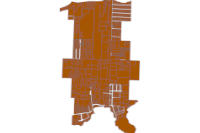

In [117]:
# Get the dataset
ds = gis.content.search('LCA Parcels Eastsound')[0]
ds